In [51]:
# Tell Jupyter to plot figure right in the page
%pip install hyperspy
# Module with plot capabilities
import matplotlib.pyplot as plt
import seaborn as sns
import hyperspy.api as hs

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path
import SimpleITK as sitk

# module to deal with images
import uproot

# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()

# Display the content of a folder
output_folder = Path('./output')
if not output_folder.is_dir():
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)

Note: you may need to restart the kernel to use updated packages.
The Current Working Directory (CWD) is: 
 /home/francesco/gate/VHEE_monitor
The folder and contains the following files:
output/dose3d_edep.raw
output/dose3d_edep.mhd
output/dose3d_dose.mhd
output/dose3d_dose_uncertainty.raw
output/dose3d_dose_uncertainty.mhd
output/stats.txt
output/dose3d_dose.raw
output/phase_space.root


In [52]:
# Set the filenames (d = depth, p = profile)
f_d_edep = output_folder / 'dose3d_dose.mhd'
f_d_uncert = output_folder / 'dose3d_dose_uncertainty.mhd'


In [53]:
# Load data from image files. 
# This is a 3 steps process:
# 1. Read the image file (with sitk.ReadImage)
# 2. Convert the image to a numpy array (with sitk.GetArrayFromImage)
# 3. Reshape the 3D image array to 1D (with reshape(-1))
d_edep = sitk.GetArrayFromImage(sitk.ReadImage(f_d_edep)).reshape(-1)




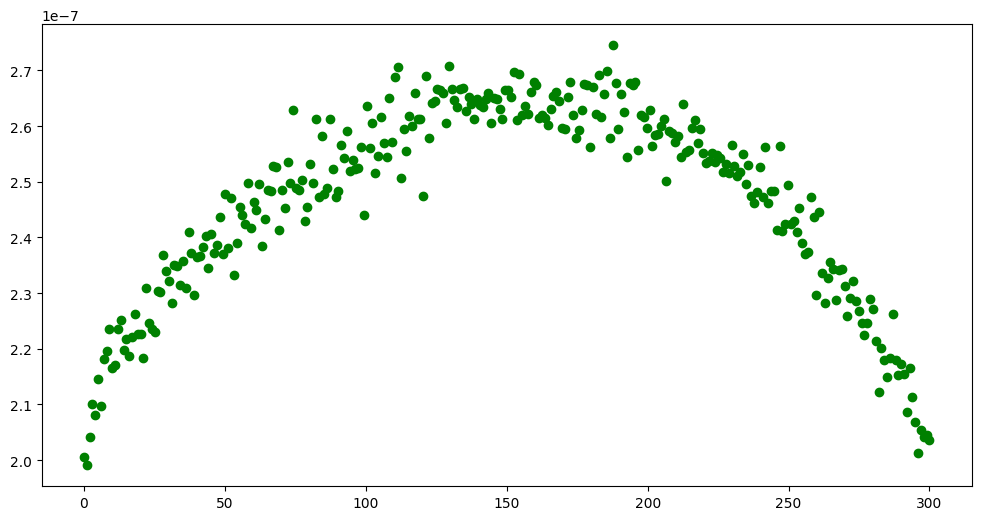

In [54]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

# X values from 0 to n, n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
plt.scatter(x, y, color='green', label='Dose')

In [ ]:
f = uproot.open('output/phase_space.root')
print("List of tree : \n", f.keys())
ph = f['PhaseSpace']
print('Number of hits:', ph.num_entries)
print('ph keys: ')
for i in ph.keys():
    print(i, ' ', end='')

List of tree : 
 ['PhaseSpace;1']
Number of hits: 901513.0
ph keys: 
KineticEnergy  PostPosition_X  PostPosition_Y  PostPosition_Z  PrePosition_X  PrePosition_Y  PrePosition_Z  PreDirection_X  PreDirection_Y  PreDirection_Z  EventPosition_X  EventPosition_Y  EventPosition_Z  

Text(0.5, 1.0, 'Angle with Z-axis')

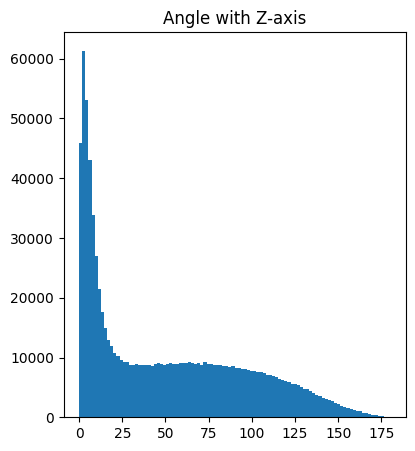

In [47]:
ppx=ph['PostPosition_X'].array()
ppy=ph['PostPosition_Y'].array()
ppz=ph['PostPosition_Z'].array()
pre_dir_x = np.array(ph.arrays()['PreDirection_X'])
pre_dir_y = np.array(ph.arrays()['PreDirection_Y'])
pre_dir_z = np.array(ph.arrays()['PreDirection_Z'])
kin = np.array(ph.arrays()['KineticEnergy'])

angle_with_z = np.arccos(pre_dir_z / np.linalg.norm([pre_dir_x, pre_dir_y, pre_dir_z], axis=0)) * 180 / np.pi

# Plot the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plt.hist(angle_with_z, bins=100, range=(0, 180))
plt.title('Angle with Z-axis')
